In [1]:
from modifier import Modifier
from global_settings import sumovsls

def modifier_sumo(interval_list, modifier_list):
        # Get interval [1.25, 2.75]
        # Get the values from the modifier array for the interval ID,[value,...]
        # Resample traffic volume with different granularity
        interval_ids = [[int(num) for num in interval] for interval in interval_list]
        mlist = []
        for interval in interval_ids:
            ids = []
            volume = []
            print(f"Print interval {interval}")
            # Get traffic volume for each id
            # We assume, constant volume per interval
            start = modifier_list[interval[0]-1][1][0]
            end = modifier_list[interval[1]-1][1][0]
            # Create step for traffic volume
            step = 25
            for value in range(start, end, step):
                volume.append(value)

            ids = Modifier.rescale(volume,interval[0],interval[1])
            print(f"volume {volume}")
            for i in range(0,len(ids)-1):
                mlist.append([ids[i],[volume[i]]*90])
            print(f"MOD list {mlist}")
        return mlist

In [6]:
# SUMO vsl
from controller_modifier_scenarios import Controller
import numpy as np
from components_configuration import components

modlist = Controller.get_list_of_modifiers(10)

In [4]:
import numpy as np
from components_configuration import components
from global_settings import simexSettings,mds

from validator_controller import ValidatorController
from modifier_controller import ModifierController
from simulator_controller import SimulatorController
mod_x,sim_y_list = SimulatorController.simulator(modlist,selected_simulator=components['sumo_simulator_novsl'])

Simulator...
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds


KeyboardInterrupt: 

In [3]:
mod_x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
sim_y_list = [386.6527777777778,
 407.91666666666674,
 423.98611111111103,
 446.8888888888889,
 481.0694444444444,
 532.4027777777778,
 556.4999999999999,
 613.8194444444445,
 701.0416666666665,
 733.1666666666663]

Validator...
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[1, 5.0]]


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


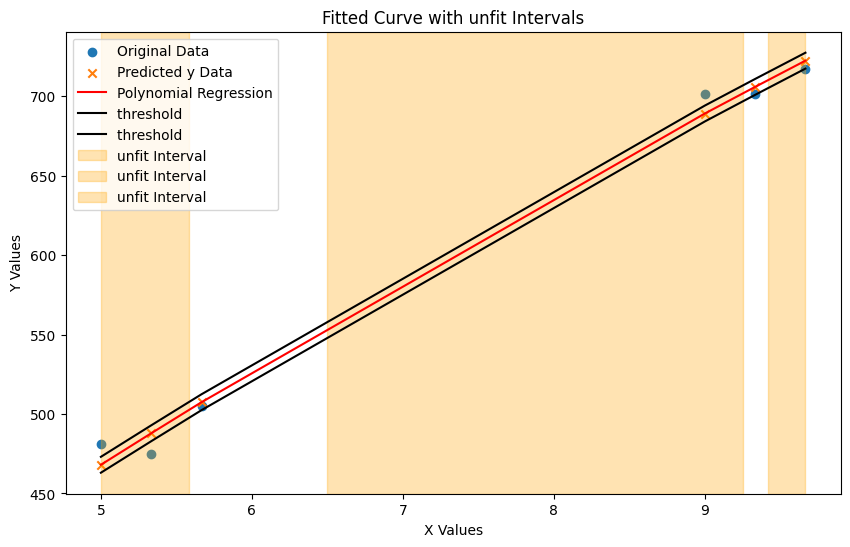

In [ ]:
from validator_controller import ValidatorController
# from modifier_controller import ModifierController
from simulator_controller import SimulatorController
validator_controller_novsl = ValidatorController()

intervals_list_novsl =  validator_controller_novsl.validate(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list), selected_validator=components['validator'],global_interval=[1, 10])
is_main_func = True
while is_main_func:
    # Calls Validator controller
    # intervals_list_novsl =  validator_controller_novsl.validate(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list), selected_validator=components['validator'],global_interval=[1, 10])
    print("MAIN interval list from VAL:", intervals_list_novsl)
    print(f"Fitted curve {validator_controller_novsl.fitted_curve} and Pred values {validator_controller_novsl.predicted_values}")
    if intervals_list_novsl:
        # Calls Modifier Controller
        mod_x_list = modifier_sumo(intervals_list_novsl,modlist)
        print("MAIN mod outcome", mod_x_list)
    
        mod_x,sim_y_list = SimulatorController.simulator(mod_x_list,selected_simulator=components['sumo_simulator_novsl'])
        assert len(mod_x) == len(sim_y_list)
        intervals_list_novsl =  validator_controller_novsl.validate(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list), selected_validator=components['validator'],global_interval=[1, 10])
    
    # Updates interval_list to new range output from validator controller
    # No more unfit intervals -> write MAIN log
    if not intervals_list_novsl:
        is_main_func = False
        # logger_main_arguments['log_contex'] = 'overall MAIN stats'
        # logger_main_arguments['main_status'] = 'no unfit intervals'
        # logger.log_main(logger_main_arguments)        # logger_main_arguments['log_contex'] = 'overall MAIN stats'
        # logger_main_arguments['main_status'] = 'no unfit intervals'
        # logger.log_main(logger_main_arguments)

In [89]:
sumovsls = {"model_path": "/home/amy/tmp/repos/sumovsl/SPSC_MD/model_MD/",
          "sumo_path": "/usr/share/sumo/bin/sumo-gui",
            "step_modifier": "25"}
modifier_sumo(interval_list=intervals_list_novsl,modifier_list=modlist)

Print interval [1, 2]
volume [2900, 2925, 2950, 2975]
MOD list [[1.0, [2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900]], [1.3333333333333333, [2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925, 2925,